<a href="https://colab.research.google.com/github/mivinmathew/DataMiningProblemSets/blob/main/DMVA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DMV A2 Problem Sets**

mivin mathew 2023


*Implementation and answers to questions are all included below.*

##**Q1_HouseholdWealth.csv**

### **Setting up Environment**

In [1]:
from google.colab import drive 

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


Importing relevant libraries

In [3]:
import csv
import numpy as np

Reading file into a Pandas Dataframe

Testing Successful File Read

Loading data from csv file

In [4]:
data = []
with open('/content/drive/MyDrive/HouseholdWealth.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        data.append(row)

*   Loading data into Numpy Array
*   Skipping first two of data(titles) using 'skiprows =1'
*   Converting rest of data into floating point values using 'dtype = float'

In [5]:
data = np.loadtxt('/content/drive/MyDrive/HouseholdWealth.csv', delimiter=',', skiprows=1, dtype=float)

Testing Succesful Conversion into Numpy Array

In [6]:
print(data)

[[1230531.   15724.]
 [4877446.  124751.]
 [4430878.  124372.]
 ...
 [ 985874.  196997.]
 [ 482927.   35603.]
 [  30641.   93254.]]


### **Question 1[a]:** Running K-means clustering algorithm

In [7]:
k = 3

In [ ]:
#max_iterations = 100

* Shuffling column data
* Initialising centroids 
* Randomly selecting k Data points without replacement


In [ ]:
#np.random.shuffle(data.T)

In [8]:
centroids = data[np.random.choice(range(len(data)), k, replace=False)]

In [9]:
print('Initial centroids:\n',centroids)

Initial centroids:
 [[2708482.   83677.]
 [2988328.  282286.]
 [3317942.   61679.]]


In [10]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [11]:
def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return clusters

In [12]:
def update_centroids(data, clusters, centroids):
    for i in range(k):
        points = [data[j] for j in range(len(data)) if clusters[j] == i]
        if len(points) > 0:
            centroids[i] = np.mean(points, axis=0)

In [13]:
max_iterations=100

In [14]:
for i in range(max_iterations):
    clusters = assign_clusters(data, centroids)
    old_centroids = centroids.copy()
    update_centroids(data, clusters, centroids)
    if np.all(old_centroids == centroids):
        break

In [15]:
print('Final centroids:\n', centroids)

Final centroids:
 [[ 862360.32335329  147073.61377246]
 [2525378.03344482  153072.41471572]
 [4127403.67847411  155618.71662125]]


* [4127403.67847411 155618.71662125] represents the centroid for the cluster with the highest total asset value and annual income. 
* [2525378.03344482 153072.41471572] represents the centroid for the cluster with a moderately high total asset value and annual income
* [862360.32335329 147073.61377246] represents the centroid for the cluster with the lowest total asset value and annual income.

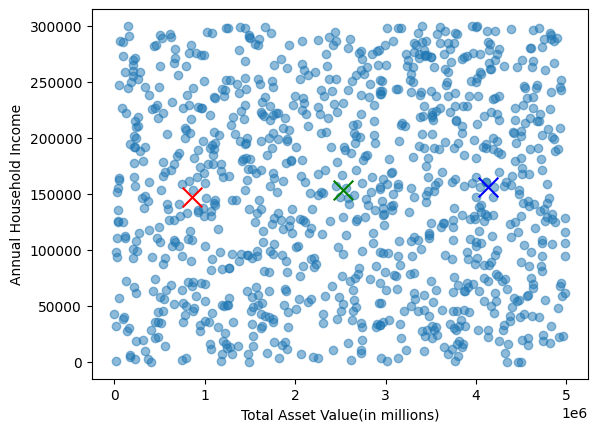

In [16]:
import matplotlib.pyplot as plt

# Define colors for each cluster
colors = ['r', 'g', 'b']

# Plot the data points
plt.scatter(data[:, 0], data[:, 1], alpha=0.5)

# Plot the centroids
for i in range(k):
    plt.scatter(centroids[i, 0], centroids[i, 1], marker='x', s=200, c=colors[i])

# Set x and y axis labels
plt.xlabel('Total Asset Value(in millions)')
plt.ylabel('Annual Household Income')

# Show the plot
plt.show()

### **Question 1[b]:** Cluster Interpretation in terms of customer segmentation.

With the three centroids as an outcome, [HA.HI, MA.MI, LA.LI] we can infer that the difference in asset accumulation is the differential factor within this dataset, as the average household income only ranges between 147,000 to 156,000 whereas the average total asset value ranges between 862,000 to 4,100,000. From this we know the centroid with the High Asset, High income have extremely advantageous spending power compared to the Low Asset, Low Income centroid, with the Moderate Asset, Moderate Income can be seen as customers with reliable purchasing power. Understanding such broad clusters of customers can help with targeted marketing - understanding and expressing the trade-off between value and price for the LA.LI customer segment, in comparison to the freedom in art direction that can be achieved with the HA.HI customer segment, who have limited financial constraints. Affordability is both an attitude and an ability as seen by the difference in customers, and when selling a product or relying on customers for profit and business operation, it is vital to cater to what is affordable and what is wanted in value by your consumer audience.

### **Question 1[c]:** Determining number of clusters in context of customer segmentation

There are two methods that can aid with determining the number of clusters that can aid with customer segmentation on a dataset.
-	Elbow method: this is a process that involves plotting the within-cluster sum of squares(WCSS) against the number of clusters. WCSS simply put is the sum of the squared distances between a datapoint and its centroid. With more centroids, and more clusters, the WCSS decreases in value due to the distance covered, and the rate in which this occurs can suggest an optimal number of clusters for a given dataset regarding customer segmentation –  known as the elbow point where the decrease rate of the WCSS is significantly slow.
-	Silhouette method: computing the silhouette coefficient for each datapoint, measuring similarity between it and its centroid, compared to other clusters. The range of this silhouette coefficient ranges from -1 to 1, with -1 indicating a poor clustered point and 1 being the opposite, The mean silhouette coefficient for each number of clusters assigned, and the specification that has the highest average is considered the optimal number of clusters to use. 


### **Question 1[d]:** Intertia and Dunn Index Calculation for Optimal K

Dunn Index : Ratio of min inter-cluster distance to the max intra-cluster distance


*   Higher Dunn Index indicates well separated clusters.



Inertia : Sum of the squared distances between each datapoint and its centroid.
* Lower Intertia indicates clusters are close together.

Low Inertia + High Dunn Index = optimal cluster result.

#### Implementation K = 2 -> K = 10

k = 2

In [28]:
k = 2
centroids = data[np.random.choice(range(len(data)), k, replace=False)]
print('Initial centroids:\n',centroids)
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))
def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return clusters
def update_centroids(data, clusters, centroids):
    for i in range(k):
        points = [data[j] for j in range(len(data)) if clusters[j] == i]
        if len(points) > 0:
            centroids[i] = np.mean(points, axis=0)
max_iterations=100
for i in range(max_iterations):
    clusters = assign_clusters(data, centroids)
    old_centroids = centroids.copy()
    update_centroids(data, clusters, centroids)
    if np.all(old_centroids == centroids):
        break

# Calculate inertia
inertia = 0
for i in range(k):
    points = [data[j] for j in range(len(data)) if clusters[j] == i]
    if len(points) > 0:
        centroid = centroids[i]
        distances = [euclidean_distance(point, centroid) ** 2 for point in points]
        inertia += np.sum(distances)

# Calculate Dunn index
inter_cluster_distances = []
for i in range(k):
    points = [data[j] for j in range(len(data)) if clusters[j] == i]
    centroid = centroids[i]
    distances = [euclidean_distance(point, centroid) for point in points]
    if len(distances) > 0:
        inter_cluster_distances.append(max(distances))
max_inter_cluster_distance = max(inter_cluster_distances)

# Calculate intra-cluster distance
intra_cluster_distances = []
for i in range(k):
    points = [data[j] for j in range(len(data)) if clusters[j] == i]
    distances = []
    for j in range(len(points)):
        for l in range(j + 1, len(points)):
            distances.append(euclidean_distance(points[j], points[l]))
    if len(distances) > 0:
        intra_cluster_distances.append(min(distances))
min_intra_cluster_distance = min(intra_cluster_distances)

dunn_index = min_intra_cluster_distance / max_inter_cluster_distance

# Print results
print('Final centroids:\n', centroids)
print('Inertia:', inertia)
print('Dunn index:', dunn_index)


Initial centroids:
 [[2972507.   97235.]
 [4089545.  219113.]]
Final centroids:
 [[1203214.7457265   149351.52991453]
 [3749565.84398496  154336.07518797]]
Inertia: 493039335348780.4
Dunn index: 0.0005783492218923254


k = 3

In [29]:
k = 3
centroids = data[np.random.choice(range(len(data)), k, replace=False)]
print('Initial centroids:\n',centroids)
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))
def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return clusters
def update_centroids(data, clusters, centroids):
    for i in range(k):
        points = [data[j] for j in range(len(data)) if clusters[j] == i]
        if len(points) > 0:
            centroids[i] = np.mean(points, axis=0)
max_iterations=100
for i in range(max_iterations):
    clusters = assign_clusters(data, centroids)
    old_centroids = centroids.copy()
    update_centroids(data, clusters, centroids)
    if np.all(old_centroids == centroids):
        break

# Calculate inertia
inertia = 0
for i in range(k):
    points = [data[j] for j in range(len(data)) if clusters[j] == i]
    if len(points) > 0:
        centroid = centroids[i]
        distances = [euclidean_distance(point, centroid) ** 2 for point in points]
        inertia += np.sum(distances)

# Calculate Dunn index
inter_cluster_distances = []
for i in range(k):
    points = [data[j] for j in range(len(data)) if clusters[j] == i]
    centroid = centroids[i]
    distances = [euclidean_distance(point, centroid) for point in points]
    if len(distances) > 0:
        inter_cluster_distances.append(max(distances))
max_inter_cluster_distance = max(inter_cluster_distances)

# Calculate the intra-cluster distance 
intra_cluster_distances = []
for i in range(k):
    points = [data[j] for j in range(len(data)) if clusters[j] == i]
    distances = []
    for j in range(len(points)):
        for l in range(j + 1, len(points)):
            distances.append(euclidean_distance(points[j], points[l]))
    if len(distances) > 0:
        intra_cluster_distances.append(min(distances))
min_intra_cluster_distance = min(intra_cluster_distances)

dunn_index = min_intra_cluster_distance / max_inter_cluster_distance

# Print results
print('Final centroids:\n', centroids)
print('Inertia:', inertia)
print('Dunn index:', dunn_index)


Initial centroids:
 [[2176067.   92150.]
 [ 621589.  290157.]
 [2847231.  274787.]]
Final centroids:
 [[2417741.31543624  151174.47986577]
 [ 815127.04761905  147591.29206349]
 [4084293.53488372  156232.70284238]]
Inertia: 243116058190689.22
Dunn index: 0.0008110648662184794


k = 4

In [26]:
k = 4
centroids = data[np.random.choice(range(len(data)), k, replace=False)]
print('Initial centroids:\n',centroids)
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))
def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return clusters
def update_centroids(data, clusters, centroids):
    for i in range(k):
        points = [data[j] for j in range(len(data)) if clusters[j] == i]
        if len(points) > 0:
            centroids[i] = np.mean(points, axis=0)
max_iterations=100
for i in range(max_iterations):
    clusters = assign_clusters(data, centroids)
    old_centroids = centroids.copy()
    update_centroids(data, clusters, centroids)
    if np.all(old_centroids == centroids):
        break
        
# Calculate inertia
inertia = 0
for i in range(k):
    points = [data[j] for j in range(len(data)) if clusters[j] == i]
    if len(points) > 0:
        centroid = centroids[i]
        distances = [euclidean_distance(point, centroid) ** 2 for point in points]
        inertia += np.sum(distances)

# Calculate Dunn index
inter_cluster_distances = []
for i in range(k):
    points = [data[j] for j in range(len(data)) if clusters[j] == i]
    centroid = centroids[i]
    distances = [euclidean_distance(point, centroid) for point in points]
    if len(distances) > 0:
        inter_cluster_distances.append(max(distances))
max_inter_cluster_distance = max(inter_cluster_distances)

intra_cluster_distances = []
for i in range(k):
    points = [data[j] for j in range(len(data)) if clusters[j] == i]
    distances = []
    for j in range(len(points)):
        for l in range(j + 1, len(points)):
            distances.append(euclidean_distance(points[j], points[l]))
    if len(distances) > 0:
        intra_cluster_distances.append(min(distances))
min_intra_cluster_distance = min(intra_cluster_distances)

dunn_index = min_intra_cluster_distance / max_inter_cluster_distance

# Print results
print('Final centroids:\n', centroids)
print('Inertia:', inertia)
print('Dunn index:', dunn_index)



Initial centroids:
 [[4000709.  165248.]
 [4250151.  215749.]
 [3591491.  189655.]
 [4843714.  127546.]]
Final centroids:
 [[1744187.20171674  148746.32188841]
 [3083801.34230769  160257.17692308]
 [ 579311.66964286  148139.24553571]
 [4310684.6254417   150160.27561837]]
Inertia: 134807065726074.62
Dunn index: 0.0010813334911792068


k = 5 

In [30]:
k = 5
centroids = data[np.random.choice(range(len(data)), k, replace=False)]
print('Initial centroids:\n',centroids)
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))
def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return clusters
def update_centroids(data, clusters, centroids):
    for i in range(k):
        points = [data[j] for j in range(len(data)) if clusters[j] == i]
        if len(points) > 0:
            centroids[i] = np.mean(points, axis=0)
max_iterations=100
for i in range(max_iterations):
    clusters = assign_clusters(data, centroids)
    old_centroids = centroids.copy()
    update_centroids(data, clusters, centroids)
    if np.all(old_centroids == centroids):
        break
inertia = 0
for i in range(k):
    points = [data[j] for j in range(len(data)) if clusters[j] == i]
    if len(points) > 0:
        centroid = centroids[i]
        distances = [euclidean_distance(point, centroid) ** 2 for point in points]
        inertia += np.sum(distances)
inter_cluster_distances = []
for i in range(k):
    points = [data[j] for j in range(len(data)) if clusters[j] == i]
    centroid = centroids[i]
    distances = [euclidean_distance(point, centroid) for point in points]
    if len(distances) > 0:
        inter_cluster_distances.append(max(distances))
max_inter_cluster_distance = max(inter_cluster_distances)
intra_cluster_distances = []
for i in range(k):
    points = [data[j] for j in range(len(data)) if clusters[j] == i]
    distances = []
    for j in range(len(points)):
        for l in range(j + 1, len(points)):
            distances.append(euclidean_distance(points[j], points[l]))
    if len(distances) > 0:
        intra_cluster_distances.append(min(distances))
min_intra_cluster_distance = min(intra_cluster_distances)

dunn_index = min_intra_cluster_distance / max_inter_cluster_distance


print('Final centroids:\n', centroids)
print('Inertia:', inertia)
print('Dunn index:', dunn_index)

Initial centroids:
 [[4892805.  289320.]
 [2709027.  275138.]
 [4256166.  279017.]
 [3659753.   95029.]
 [2225999.   87644.]]
Final centroids:
 [[4510168.44041451  151778.26943005]
 [1592720.62385321  147537.28899083]
 [3647308.775       160930.805     ]
 [2710039.31182796  152474.54301075]
 [ 525462.3546798   147785.94581281]]
Inertia: 88464072120466.7
Dunn index: 0.0013127646084169864


k = 6 

In [31]:
k = 6
centroids = data[np.random.choice(range(len(data)), k, replace=False)]
print('Initial centroids:\n',centroids)
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))
def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return clusters
def update_centroids(data, clusters, centroids):
    for i in range(k):
        points = [data[j] for j in range(len(data)) if clusters[j] == i]
        if len(points) > 0:
            centroids[i] = np.mean(points, axis=0)
max_iterations=100
for i in range(max_iterations):
    clusters = assign_clusters(data, centroids)
    old_centroids = centroids.copy()
    update_centroids(data, clusters, centroids)
    if np.all(old_centroids == centroids):
        break
inertia = 0
for i in range(k):
    points = [data[j] for j in range(len(data)) if clusters[j] == i]
    if len(points) > 0:
        centroid = centroids[i]
        distances = [euclidean_distance(point, centroid) ** 2 for point in points]
        inertia += np.sum(distances)
inter_cluster_distances = []
for i in range(k):
    points = [data[j] for j in range(len(data)) if clusters[j] == i]
    centroid = centroids[i]
    distances = [euclidean_distance(point, centroid) for point in points]
    if len(distances) > 0:
        inter_cluster_distances.append(max(distances))
max_inter_cluster_distance = max(inter_cluster_distances)
intra_cluster_distances = []
for i in range(k):
    points = [data[j] for j in range(len(data)) if clusters[j] == i]
    distances = []
    for j in range(len(points)):
        for l in range(j + 1, len(points)):
            distances.append(euclidean_distance(points[j], points[l]))
    if len(distances) > 0:
        intra_cluster_distances.append(min(distances))
min_intra_cluster_distance = min(intra_cluster_distances)

dunn_index = min_intra_cluster_distance / max_inter_cluster_distance


print('Final centroids:\n', centroids)
print('Inertia:', inertia)
print('Dunn index:', dunn_index)

Initial centroids:
 [[2959518.  250817.]
 [1095067.  176237.]
 [2891705.   31339.]
 [1475239.    6828.]
 [3362165.  293165.]
 [4182979.  147345.]]
Final centroids:
 [[2906531.68674699  151190.5060241 ]
 [ 411590.81875     147570.45625   ]
 [2030783.61428571  155282.93571429]
 [1260286.7245509   146363.65868263]
 [3745261.39690722  159134.34020619]
 [4555933.1734104   151676.34104046]]
Inertia: 65882868131830.766
Dunn index: 0.0016276753960671715


k = 7

In [32]:
k = 7
centroids = data[np.random.choice(range(len(data)), k, replace=False)]
print('Initial centroids:\n',centroids)
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))
def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return clusters
def update_centroids(data, clusters, centroids):
    for i in range(k):
        points = [data[j] for j in range(len(data)) if clusters[j] == i]
        if len(points) > 0:
            centroids[i] = np.mean(points, axis=0)
max_iterations=100
for i in range(max_iterations):
    clusters = assign_clusters(data, centroids)
    old_centroids = centroids.copy()
    update_centroids(data, clusters, centroids)
    if np.all(old_centroids == centroids):
        break
inertia = 0
for i in range(k):
    points = [data[j] for j in range(len(data)) if clusters[j] == i]
    if len(points) > 0:
        centroid = centroids[i]
        distances = [euclidean_distance(point, centroid) ** 2 for point in points]
        inertia += np.sum(distances)
inter_cluster_distances = []
for i in range(k):
    points = [data[j] for j in range(len(data)) if clusters[j] == i]
    centroid = centroids[i]
    distances = [euclidean_distance(point, centroid) for point in points]
    if len(distances) > 0:
        inter_cluster_distances.append(max(distances))
max_inter_cluster_distance = max(inter_cluster_distances)
intra_cluster_distances = []
for i in range(k):
    points = [data[j] for j in range(len(data)) if clusters[j] == i]
    distances = []
    for j in range(len(points)):
        for l in range(j + 1, len(points)):
            distances.append(euclidean_distance(points[j], points[l]))
    if len(distances) > 0:
        intra_cluster_distances.append(min(distances))
min_intra_cluster_distance = min(intra_cluster_distances)

dunn_index = min_intra_cluster_distance / max_inter_cluster_distance


print('Final centroids:\n', centroids)
print('Inertia:', inertia)
print('Dunn index:', dunn_index)

Initial centroids:
 [[3647621.   13454.]
 [4542203.  213504.]
 [1641046.  116965.]
 [2793856.  184421.]
 [ 850286.  282875.]
 [4328701.  160269.]
 [1904497.   80547.]]
Final centroids:
 [[3392370.51111111  168333.48148148]
 [4657062.5530303   150060.84090909]
 [1039428.15328467  143552.65693431]
 [2676511.          155867.50331126]
 [ 331464.41221374  148569.82442748]
 [4007890.67549669  150247.1986755 ]
 [1779160.1595092   147960.58895706]]
Inertia: 47962428457199.29
Dunn index: 0.001609282874805485


k = 8

In [33]:
k = 8
centroids = data[np.random.choice(range(len(data)), k, replace=False)]
print('Initial centroids:\n',centroids)
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))
def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return clusters
def update_centroids(data, clusters, centroids):
    for i in range(k):
        points = [data[j] for j in range(len(data)) if clusters[j] == i]
        if len(points) > 0:
            centroids[i] = np.mean(points, axis=0)
max_iterations=100
for i in range(max_iterations):
    clusters = assign_clusters(data, centroids)
    old_centroids = centroids.copy()
    update_centroids(data, clusters, centroids)
    if np.all(old_centroids == centroids):
        break
inertia = 0
for i in range(k):
    points = [data[j] for j in range(len(data)) if clusters[j] == i]
    if len(points) > 0:
        centroid = centroids[i]
        distances = [euclidean_distance(point, centroid) ** 2 for point in points]
        inertia += np.sum(distances)
inter_cluster_distances = []
for i in range(k):
    points = [data[j] for j in range(len(data)) if clusters[j] == i]
    centroid = centroids[i]
    distances = [euclidean_distance(point, centroid) for point in points]
    if len(distances) > 0:
        inter_cluster_distances.append(max(distances))
max_inter_cluster_distance = max(inter_cluster_distances)
intra_cluster_distances = []
for i in range(k):
    points = [data[j] for j in range(len(data)) if clusters[j] == i]
    distances = []
    for j in range(len(points)):
        for l in range(j + 1, len(points)):
            distances.append(euclidean_distance(points[j], points[l]))
    if len(distances) > 0:
        intra_cluster_distances.append(min(distances))
min_intra_cluster_distance = min(intra_cluster_distances)

dunn_index = min_intra_cluster_distance / max_inter_cluster_distance


print('Final centroids:\n', centroids)
print('Inertia:', inertia)
print('Dunn index:', dunn_index)

Initial centroids:
 [[ 659957.  176629.]
 [4092631.   54574.]
 [2451024.  156764.]
 [3399742.  299383.]
 [4128991.   71837.]
 [ 131042.   72305.]
 [4843791.  104920.]
 [2650036.   55689.]]
Final centroids:
 [[ 989358.55223881  141938.82089552]
 [3520134.22058824  168116.18382353]
 [1657983.75182482  150840.2189781 ]
 [2889820.8699187   149665.89430894]
 [4072303.81746032  147861.52380952]
 [ 309753.20325203  146953.75609756]
 [4664226.92248062  152921.46511628]
 [2294285.77173913  158836.48913043]]
Inertia: 37867884928564.51
Dunn index: 0.0021003500785637987


k = 9

In [34]:
k = 9
centroids = data[np.random.choice(range(len(data)), k, replace=False)]
print('Initial centroids:\n',centroids)
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))
def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return clusters
def update_centroids(data, clusters, centroids):
    for i in range(k):
        points = [data[j] for j in range(len(data)) if clusters[j] == i]
        if len(points) > 0:
            centroids[i] = np.mean(points, axis=0)
max_iterations=100
for i in range(max_iterations):
    clusters = assign_clusters(data, centroids)
    old_centroids = centroids.copy()
    update_centroids(data, clusters, centroids)
    if np.all(old_centroids == centroids):
        break
inertia = 0
for i in range(k):
    points = [data[j] for j in range(len(data)) if clusters[j] == i]
    if len(points) > 0:
        centroid = centroids[i]
        distances = [euclidean_distance(point, centroid) ** 2 for point in points]
        inertia += np.sum(distances)
inter_cluster_distances = []
for i in range(k):
    points = [data[j] for j in range(len(data)) if clusters[j] == i]
    centroid = centroids[i]
    distances = [euclidean_distance(point, centroid) for point in points]
    if len(distances) > 0:
        inter_cluster_distances.append(max(distances))
max_inter_cluster_distance = max(inter_cluster_distances)
intra_cluster_distances = []
for i in range(k):
    points = [data[j] for j in range(len(data)) if clusters[j] == i]
    distances = []
    for j in range(len(points)):
        for l in range(j + 1, len(points)):
            distances.append(euclidean_distance(points[j], points[l]))
    if len(distances) > 0:
        intra_cluster_distances.append(min(distances))
min_intra_cluster_distance = min(intra_cluster_distances)

dunn_index = min_intra_cluster_distance / max_inter_cluster_distance


print('Final centroids:\n', centroids)
print('Inertia:', inertia)
print('Dunn index:', dunn_index)

Initial centroids:
 [[2549036.  188593.]
 [3281446.  256946.]
 [1200872.   19054.]
 [ 116529.  258383.]
 [4401570.  166119.]
 [1884792.  217586.]
 [3899205.   97920.]
 [ 796109.  263648.]
 [4729357.  108776.]]
Final centroids:
 [[2543076.50505051  158742.76767677]
 [3063351.50485437  154648.23300971]
 [1434135.18518519  145805.05555556]
 [ 285593.05263158  144304.5877193 ]
 [4109936.26446281  151731.44628099]
 [1931052.39393939  144614.14141414]
 [3593927.28455285  160911.79674797]
 [ 883710.96363636  152113.34545455]
 [4678063.46341463  154149.69918699]]
Inertia: 32394635949641.062
Dunn index: 0.0022319904300779087


k = 10

In [35]:
k = 10
centroids = data[np.random.choice(range(len(data)), k, replace=False)]
print('Initial centroids:\n',centroids)
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))
def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return clusters
def update_centroids(data, clusters, centroids):
    for i in range(k):
        points = [data[j] for j in range(len(data)) if clusters[j] == i]
        if len(points) > 0:
            centroids[i] = np.mean(points, axis=0)
max_iterations=100
for i in range(max_iterations):
    clusters = assign_clusters(data, centroids)
    old_centroids = centroids.copy()
    update_centroids(data, clusters, centroids)
    if np.all(old_centroids == centroids):
        break
inertia = 0
for i in range(k):
    points = [data[j] for j in range(len(data)) if clusters[j] == i]
    if len(points) > 0:
        centroid = centroids[i]
        distances = [euclidean_distance(point, centroid) ** 2 for point in points]
        inertia += np.sum(distances)
inter_cluster_distances = []
for i in range(k):
    points = [data[j] for j in range(len(data)) if clusters[j] == i]
    centroid = centroids[i]
    distances = [euclidean_distance(point, centroid) for point in points]
    if len(distances) > 0:
        inter_cluster_distances.append(max(distances))
max_inter_cluster_distance = max(inter_cluster_distances)
intra_cluster_distances = []
for i in range(k):
    points = [data[j] for j in range(len(data)) if clusters[j] == i]
    distances = []
    for j in range(len(points)):
        for l in range(j + 1, len(points)):
            distances.append(euclidean_distance(points[j], points[l]))
    if len(distances) > 0:
        intra_cluster_distances.append(min(distances))
min_intra_cluster_distance = min(intra_cluster_distances)

dunn_index = min_intra_cluster_distance / max_inter_cluster_distance


print('Final centroids:\n', centroids)
print('Inertia:', inertia)
print('Dunn index:', dunn_index)

Initial centroids:
 [[3.902300e+06 7.024700e+04]
 [1.360551e+06 2.481350e+05]
 [3.764320e+06 4.540000e+02]
 [4.111887e+06 1.905620e+05]
 [1.043558e+06 3.607200e+04]
 [4.341710e+05 2.814250e+05]
 [1.815043e+06 1.989640e+05]
 [2.587509e+06 1.460520e+05]
 [2.309293e+06 3.434700e+04]
 [2.910584e+06 3.354700e+04]]
Final centroids:
 [[4085705.18032787  152324.17213115]
 [1358639.19512195  143564.17073171]
 [3581107.18803419  161752.05128205]
 [4666496.6953125   153152.578125  ]
 [ 876224.81308411  153085.3364486 ]
 [ 285593.05263158  144304.5877193 ]
 [1759289.96703297  144583.6043956 ]
 [2648574.86419753  152452.40740741]
 [2199465.640625    161928.234375  ]
 [3085090.96808511  153393.22340426]]
Inertia: 28760132506540.406
Dunn index: 0.0022290597138992434


#### Table and Optimal K 

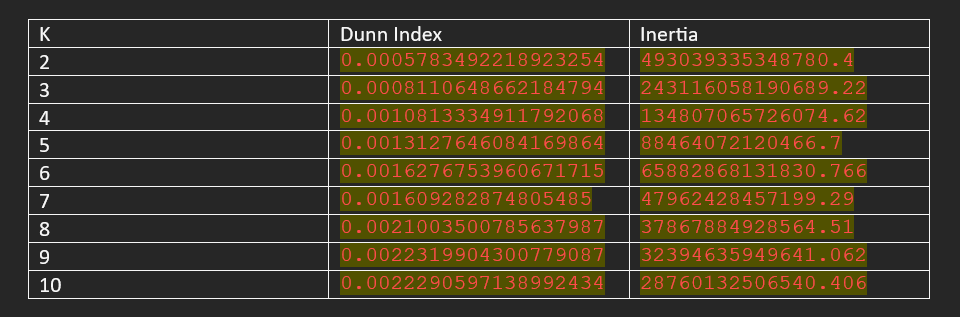

OPTIMAL K = 10

Highest Dunn index is k = 9
Second Highest Dunn index is k = 10

Lowest Intertia is k = 10


##**Q2_Weighted KNN**

###  **Question 2[a]:** Advantages + Disadvantages 

The 1NN,KNN,nNN and weighted nearest neighbour[WNN] classifier are diverse algorithms. We understand that the KNN classifier can be viewed as having a voting mechanism. It is less sensitive to outliers, more accurate on average and computationally expensive then 1NN, which is the simplest and most robust algorithm, being able to handle nonlinear data - even though it can be sensitive to outliers. Both the nNN and WNN can be more accurate then 1NN or KNN, however they are computationally more expensive. The nNN specialises with accuracy on datasets with a small amount of training examples, whereas the WNN achieves this accuracy by assigning different weights to different neighbour in comparison to the accuracy levels of 1NN and KNN. Both of these classifiers are also less robust when it comes to overfitting, making the decision of choice come down to accuracy or optimality between these four classifiers.

###  **Question 2[b]:** Weighted Nearest Neighbour Classifier based on weighting factors

In [ ]:
# using w = 1/distance

In [76]:
# import relevant and permissable library
import numpy as np

#Initialise our Weighted Nearest Neighbour in a class for future implementation
class WeightedNearestNeighborClassifier:

    #k = 5
    def __init__(self, k=5):
        self.k = k

    #store training samples and their class labels
    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, b):
        # Calculate the distances between the new data points and the training samples
        # 'np.linalg.norm()' by default calculates Euclidean distance between vectors
        distances = np.linalg.norm(b - self.X, axis=1)

        # Sort the distances in ascending order.
        # 'np.argsorts()' returns indices of the elemetns in a sorted array
        indices = np.argsort(distances)

        # Select the k nearest neighbors.
        #'[:self.k]' slice selects first k elemtn from array
        nearest_neighbors = indices[:self.k]

        # Calculate the weights for each neighbor.
        # as proposed, inversely proportional to the distance of datapoints and their nearest neighbours
        weights = 1 / distances[nearest_neighbors]

        # Calculate the class of the new data point.
        #'np.argmax()' returns index of maximum element in an array
        class_label = np.argmax(np.dot(weights, self.y[nearest_neighbors]))

        return class_label

###  **Question 2[c]:** Weighting Factor Proposal

A weighting factor that assigns the training sample close to the new datapoint that is a higher weight then those that are far away from it could be w =1/distance, where the weighting factor is inversely proportional. The closer the training sample is to the new data point, the higher its weight will be.

## **Q3_Multi - Layer Neural Network**

###  **Question 3[a]:** Implementation

#### Setting up Environment

Using Keras as built on TensorFlow

Using SKLearn Library MLP Classifier 

In [4]:
import numpy as np
import pandas as pd
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from keras.models import Sequential
from keras.layers import Dense
from google.colab import drive

In [11]:
drive.mount('/content/drive')

#training data.
training_data = pd.read_csv('/content/drive/MyDrive/AtRiskStudentsTraining.csv')

#test data.
test_data = pd.read_csv('/content/drive/MyDrive/AtRiskStudentsTest.csv')

#training data2
train = pd.read_csv('/content/drive/MyDrive/AtRiskStudentsTraining.csv')

#test data2
test = pd.read_csv('/content/drive/MyDrive/AtRiskStudentsTest.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Creating Neural Network Model with 1 hidden layer of 5 neurons relative to our input size, as well as an Activation Function

* Activation function: Rectified linear unit activatiion function [relu] allows NN to learn more complex relationships between features and labels.

In [23]:
# INPUT LAYER

#SKLEARN MLP CLASSIFIER
# Split the training data into features (X) and labels
X_train = train.iloc[:, :-1].values
y_train = train.iloc[:, -1].values

# Split the testing data into features (X_test) and labels (y_test)
X_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values

# Create an instance of the MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', random_state=0)

# Fit the MLP model to the training data
clf.fit(X_train, y_train)


#KERAS
# Change the `features` variable to include the new features.
features = training_data[['GPA', 'attendance', 'duration', 'language']]#.values.reshape(-1,4)

# Change the `labels` variable to be a binary column.
labels = training_data['at-risk'].astype('int32')

# HIDDEN LAYER
#test_data = test_data.drop('language', axis=1)

# Train the neural network model on the new data.
model = Sequential()
model.add(Dense(5, input_dim=features.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#Using Adam optimizer as its the fastest
#Binary Cross-Entropy Loss function
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(features, labels, epochs=5)



Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 1173.6116 - accuracy: 0.4870
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 992.0170 - accuracy: 0.4880
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 793.7791 - accuracy: 0.4900
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 597.6092 - accuracy: 0.4850
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 400.9515 - accuracy: 0.4880


###  **Question 3[b]:** Validation on Test data + Error Function using MSE AND MAE

In [24]:
#OUTPUT LAYER

#MLP CLASSIFIER
# Predict the output for the testing data
y_pred = clf.predict(X_test)

# Calculate the F1 score on the testing data
f1 = f1_score(y_test, y_pred)

print('F1 Score: ', f1)


#KERAS MODEL
# Use the model to make predictions on the test data.
predictions = model.predict(test_data)

# Calculate the accuracy of the predictions.
accuracy = np.mean(predictions == test_data['at-risk'].values)

# Compare the accuracy of the predictions to the accuracy of the model on the training data.
print('Accuracy on test data: {}'.format(accuracy))

F1 Score:  0.570909090909091
16/16 [==============================] - 0s 1ms/step
Accuracy on test data: 0.473252


#### Error function continuing off Keras Model Training and Validation

In [26]:
# Calculate the mean squared error
mse = np.mean((predictions - test_data['at-risk'].values)**2)

# Print the mean squared error
print('Mean squared error: {}'.format(mse))

# Calculate the mean absolute error
mae = np.mean(np.abs(predictions - test_data['at-risk'].values))

# Print the mean absolute error
print('Mean absolute error: {}'.format(mae))

Mean squared error: 0.5051163305258982
Mean absolute error: 0.505626818003005


DecisionTreeClassifier from SKLEARN, seeing if supervised learning has better accuracy for fun

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Create the decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(features, labels)

# Make predictions on the test data
predictions = clf.predict(test_data.values)

# Calculate the accuracy of the predictions
accuracy = np.mean(predictions == test_data['at-risk'].values)

# Print the accuracy
print('Accuracy on test data: {}'.format(accuracy))

Accuracy on test data: 0.48


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### **Question 3[c]:** Training using Varying Hidden Layers and Neurons

In [64]:
drive.mount('/content/drive')

#training data.
training_data = pd.read_csv('/content/drive/MyDrive/AtRiskStudentsTraining.csv')

#test data.
test_data = pd.read_csv('/content/drive/MyDrive/AtRiskStudentsTest.csv')

# Change the `features` variable to include the new features.
features = training_data[['GPA', 'attendance', 'duration', 'language']]
print(features.shape)

# Change the `labels` variable to be a binary column.
labels = training_data['at-risk'].astype('int32')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(1000, 4)


Variation List to store details of testing NN

In [68]:
test_data = test_data.drop('language', axis=1)

# Create a list of variations of the neural network.
variations = []

# Add a variation with 1 hidden layer and 5 neurons.
variations.append((1, 5))

# Add a variation with 2 hidden layers and 10 neurons in each hidden layer.
variations.append((2, 10, 10))

# Add a variation with 3 hidden layers and 20 neurons in each hidden layer.
variations.append((3, 20, 20))

# Add a variation wit 1 hidden layer with 10 neurons
variations.append((1, 10))

# Add a variation wit 2 hidden layers with 5 neurons in each hidden layer
variations.append((2, 5, 5))

# Add a variation wit 3 hidden layers with 3 neurons in each hidden layer
variations.append((3, 3, 3))

# Add a variation wit 1 hidden layer with 20 neurons
variations.append((1, 20))

# Add a variation wit 2 hidden layers with 15 neurons in each hidden layer
variations.append((2, 15, 15))

# Add a variation wit 3 hidden layers with 10 neurons in each hidden layer
variations.append((3, 10, 10))

# Add a variation wit 4 hidden layers with 5 neurons in each hidden layer
variations.append((4, 5, 5, 5))

For Loop to iterate each variation of the neural network, outputting results for table capture

In [72]:
# For each variation of the neural network:
for variation in variations:

    # Create a neural network with the specified number of hidden layers and neurons.
    model = Sequential()
    model.add(Dense(variation[0], input_shape=(4,), activation='relu'))
    for i in range(len(variation)-1):
        model.add(Dense(variation[i + 1], activation='relu'))
        model.add(Dense(1, activation='sigmoid'))

    # Compile the neural network.
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the neural network on the training data.
    model.fit(features, labels, epochs=5)

    # Make predictions on the testing data.
    predictions = model.predict(test_data)
    predictions = predictions.reshape((-1, 1)) # Reshape to (n_samples, 1)

    # Convert predictions to binary labels.
    binary_predictions = (predictions > 0.5).astype('int32')
    # Calculate the error of the predictions using error function from [b]
    # Using MAE as data is not normally distributed
    error = np.mean(np.abs(binary_predictions - test_data['at-risk'].values))


    # Print the output following training for table capture and analysis
    print('Error for variation {}: {}'.format(variation, error))
    print('Number of hidden layers: {}'.format(variation[0]))
    print('Number of neurons: {}'.format(variation[1:]))
    print('\n')

Epoch 1/5
32/32 [==============================] - 1s 4ms/step - loss: 1330.5649 - accuracy: 0.4850
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 1065.8669 - accuracy: 0.4850
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 840.3148 - accuracy: 0.4850
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 633.7781 - accuracy: 0.4850
Epoch 5/5
16/16 [==============================] - 0s 3ms/step
Error for variation (1, 5): 0.506
Number of hidden layers: 1
Number of neurons: (5,)


Epoch 1/5
32/32 [==============================] - 2s 6ms/step - loss: 0.6932 - accuracy: 0.4970
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5130
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5130
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5130
Epoch 5/5
16/16 [==============================] - 0s 1ms/step
E

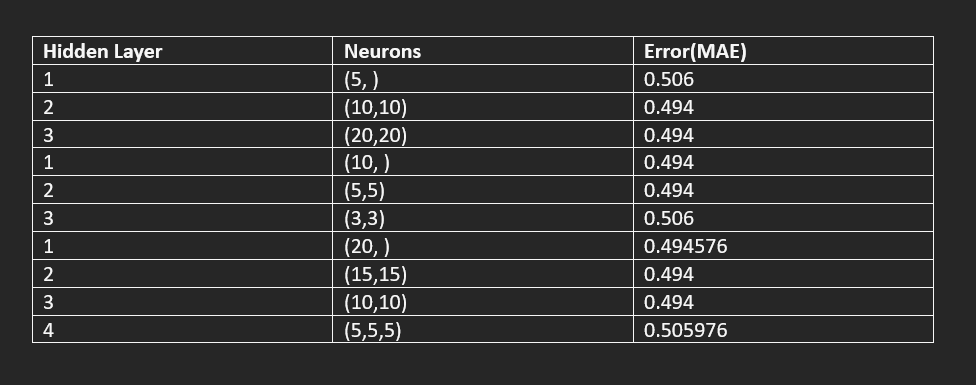

### **Question 3[d]:** Drawbacks of Variation Error Function 

Using the error function from [b] we calculated the MAE of 10 variations of hidden layer-neuron combinations. Through this we were able to visualise the differences that the variations from correlating the error function to specific variation structure. This is a classification task, and the data is not normally distributed, so it was most appropriate to use MAE instead of MSE. The variation with the lowest MAE is the apparent variation that is most optimal and performs best on our dataset. However, keeping in mind that only 10 variations were tested, and that at randomly – appropriate and thorough testing can involve more variation which can be time consuming with training and evaluation. Furthermore, with larger datasets and more complex relationships, it can be computationally expensive to utilise this approach in finding the optimal variation to use. There is no guarantee that the lowest MAE given from the hidden layer-neuron combination is the most optimal variation, so this approach has a few drawbacks in terms of defining an absolute, but it still works great as a starting point for fine-tuning our model and its hyperparameters, and using other methods such as hyperparameter optimisation to continue on from there.

## **Q4_Association Analysis**

**Creating an application that reads in 'shopppingtransactions.csv' and allows users to interact with the app using 'sup', 'con' and 'exit'**

Importing relevant libraries 

In [77]:
import numpy as np #for calculation support and confidence of items
import csv

loading our 'shoppingtransactions.csv' file from google drive

In [78]:
from google.colab import drive 

In [79]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
csv_file = '/content/drive/MyDrive/shoppingtransactions.csv'

reading our csv file and creating an empty list with each row transaction data appended into it

In [85]:
def read_csv(csv_file):
    with open(csv_file,'r') as f:
        reader = csv.reader(f)
        transactions=[]
        for row in reader:
          transactions.append(row)
    return transactions

creating a 'calculate_support()' function that uses the 'count_nonzero()' from NumPy

*  counts the # of transactions that contain the given item
* returns the # of transactions that contain the given item divided by the total transactions for overview data when requested by user with 'sup'




In [112]:
def calculate_support(item,transactions):
    total_transactions =len(transactions)
    #transactions_with_item = np.count_nonzero(np.isin(transactions,item))
    transactions_with_item = sum([1 for row in transactions if item in row])
    return transactions_with_item/total_transactions

creating a 'calculate_confidence()' function that uses 'calculate_support()'
* calculates support of first item
* uses 'count_nonzero()' to count number of transactions that contain both items as specified by the user

In [113]:
def calculate_confidence(item1,item2,transactions):
  support_of_item1 = calculate_support(item1,transactions)
  support_of_item1_and_item2 = calculate_support(item2,transactions)
  return support_of_item1_and_item2/support_of_item1

defining main program to read our csv file transactions,using a 'while' loop to to create an interactive loop for the user to engage with using commands 'sup','con' and 'exit'

In [115]:
def main():
  #transactions = read_csv('shoppingtransactions.csv')
  import csv
  from google.colab import drive
  drive.mount('/content/drive')

  csv_file_path = '/content/drive/MyDrive/shoppingtransactions.csv'

  with open(csv_file_path,'r') as f:
      transactions = csv.reader(f)

  while True:
    print('Welcome to Shopping Transactions'+'/n')
    command = input("Enter a command('sup', 'con', 'exit')")
    if command == 'sup':
      item = input('Enter a single item: ')
      # typeError here
      print(calculate_support(item,transactions))
    elif command == 'con':
      item1 = input('Enter first item: ')
      item2 = input('Enter second item: ')
      print(calculate_confidence([item1,item2],transactions))
    elif command == 'exit':
      break

if __name__ =='__main__':
  main()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Welcome to Shopping Transactions/n
Enter a command('sup', 'con', 'exit')exit
